In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [3]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 5


In [5]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139099 sha256=b2f03390c824c1fcc044ebdee9dc1eafa87386f5b2e7a7134e5e72ccb061c95e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\25\cb\79\a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


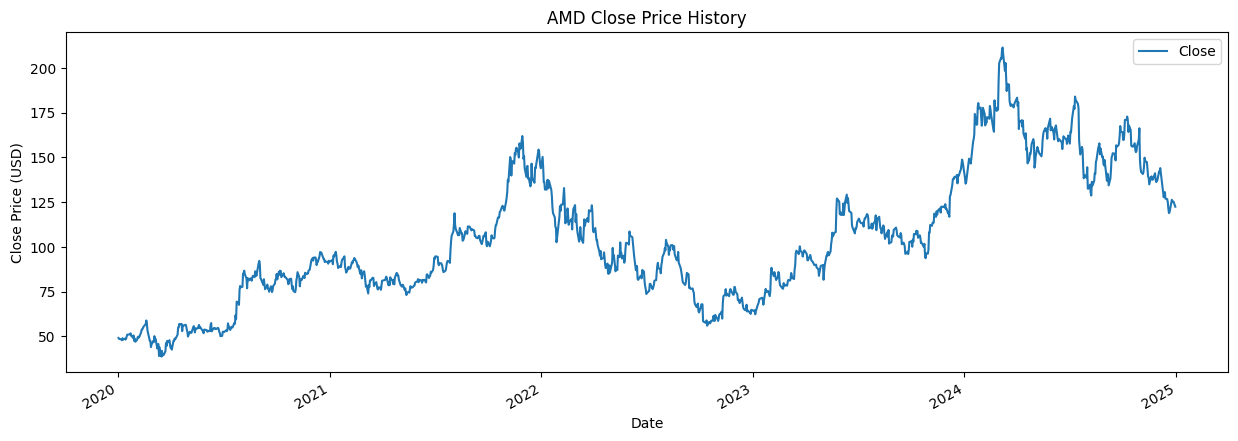

In [54]:
# Create a Ticker object for AMD
AMD = yf.Ticker("AMD")

# Getting the historical market data
AMD_values = AMD.history(start="2020-01-01",end="2024-12-31")

# Plotting the close price of AMD
AMD_values[['Close']].plot()
plt.title('AMD Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

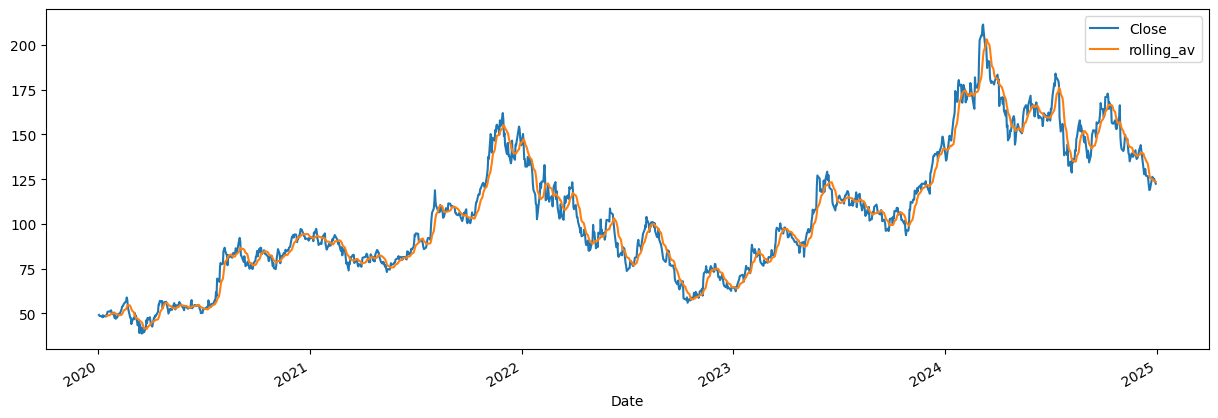

In [55]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();

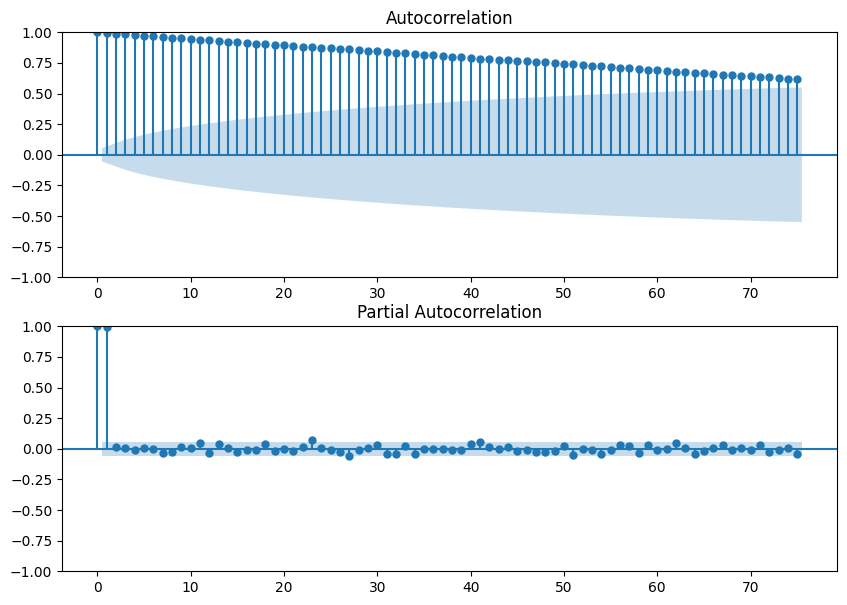

In [56]:
# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    plot_acf(timeseries, ax=ax1, lags=75)
    plot_pacf(timeseries, ax=ax2, lags=75)
    plt.show()


# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])

In [57]:
#creating the model
MA_model = ARIMA(endog=AMD_values['Close'], order=(0, 0, 55))

#fitting data to the model
results = MA_model.fit()

#summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                ARIMA(0, 0, 55)   Log Likelihood               -4350.604
Date:                Fri, 02 May 2025   AIC                           8815.209
Time:                        16:28:18   BIC                           9107.988
Sample:                             0   HQIC                          8925.244
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.6335      1.834     56.514      0.000     100.039     107.228
ma.L1          2.2860      0.056     41.088      0.000       2.177       2.395
ma.L2          3.5272      0.182     19.418      0.0

In [67]:
#prediction data
start_date = '2023-01-03'
end_date   = '2024-05-01'
AMD_values['prediction'] = results.predict(start=start_date, end=end_date)

#printing last 14 values of the prediction with original and rolling avg value
print(AMD_values[['Close','rolling_av','prediction']].tail(14))

                                Close  rolling_av  prediction
Date                                                         
2024-12-10 00:00:00-05:00  127.739998  137.772999         NaN
2024-12-11 00:00:00-05:00  130.149994  137.015998         NaN
2024-12-12 00:00:00-05:00  130.600006  136.451998         NaN
2024-12-13 00:00:00-05:00  126.910004  135.424999         NaN
2024-12-16 00:00:00-05:00  126.690002  133.888000         NaN
2024-12-17 00:00:00-05:00  125.019997  132.192000         NaN
2024-12-18 00:00:00-05:00  121.410004  129.934000         NaN
2024-12-19 00:00:00-05:00  118.879997  127.685999         NaN
2024-12-20 00:00:00-05:00  119.209999  125.748000         NaN
2024-12-23 00:00:00-05:00  124.599998  125.121000         NaN
2024-12-24 00:00:00-05:00  126.290001  124.976000         NaN
2024-12-26 00:00:00-05:00  125.059998  124.467001         NaN
2024-12-27 00:00:00-05:00  125.190002  123.926000         NaN
2024-12-30 00:00:00-05:00  122.440002  123.479000         NaN


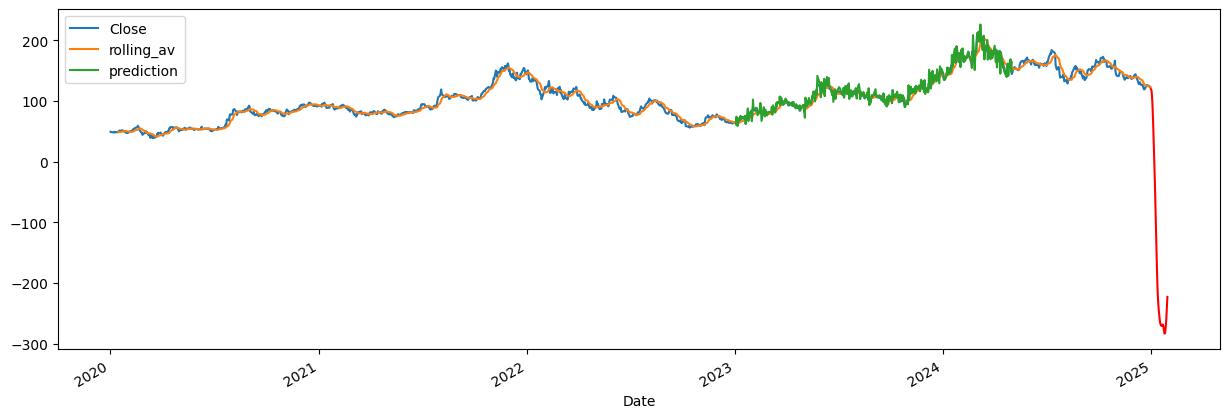

In [68]:
# Forecast future values
# Forecast future closing prices
forecast_steps = 30  # Forecasting for the next 30 days
forecast_index = pd.date_range(start=AMD_values['Close'].index[-1], periods=forecast_steps+1, freq='D')[1:]  # Generate datetime index for forecast
forecast = results.forecast(steps=forecast_steps)

# plotting the end results
AMD_values[['Close','rolling_av','prediction']].plot()
plt.plot(forecast_index, forecast, color='red', label='Forecast')